In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
ASTAR_FILE = './astar-1q-e0.01-p1.0-b100.txt'
TRASYN_FILE = './trasyn-1q-e0.01.txt'

In [13]:
def load_astar_data(filename):
    lines = open(filename, 'r').read().split('\n')[:-1]
    #N = len(lines)
    N = 1000
    
    gate_count = np.zeros(N, dtype=int)
    t_count = np.zeros(N, dtype=int)
    time = np.zeros(N, dtype=float)
    err = np.zeros(N, dtype=float)

    for x in lines:
        cols = x.split(' ')
        i = int(cols[0].split('.')[0])

        gate_count[i] = int(cols[3].split(',')[0])
        t_count[i] = int(cols[5].split(',')[0])
        time[i] = float(cols[7].split(',')[0].split('s')[0])
        err[i] = float(cols[9])

    return (gate_count, t_count, time, err)

In [14]:
def load_trasyn_data(filename):
    lines = open(filename, 'r').read().split('\n')[1:-1]
    N = len(lines)
    
    gate_count = np.zeros(N, dtype=int)
    t_count = np.zeros(N, dtype=int)
    time = np.zeros(N, dtype=float)
    err = np.zeros(N, dtype=float)

    for x in lines:
        cols = x.split(' ')
        i = int(cols[0].split('.')[0])

        time[i] = float(cols[3])
        t_count[i] = int(cols[6])
        gate_count[i] = int(cols[10])
        err[i] = float(cols[13])

    return (gate_count, t_count, time, err)

In [15]:
astar_gate, astar_t, astar_time, astar_err = load_astar_data(ASTAR_FILE)
tr_gate, tr_t, tr_time, tr_err = load_trasyn_data(TRASYN_FILE)

In [16]:
def plot_metric(xs, ys, name, eqline=True):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

    fig.suptitle(name)
    ax1.set_xlabel('Trasyn')
    ax1.set_ylabel('A* search')

    if eqline:
        L = min(min(xs), min(ys))
        R = max(max(xs), max(ys))
        ax1.plot(np.linspace(L, R), np.linspace(L, R), linestyle='--', \
                 color='gray', linewidth=1.5, zorder=-1, alpha=0.7)
        
    ax1.scatter(xs, ys, s=10, alpha=0.5)
    ax1.grid()
    ax1.set_axisbelow(True)
    
    ax2.hist(ys - xs)
    ax2.set_xlabel('Difference (A* - Trasyn)')
    ax2.set_ylabel('Frequency')

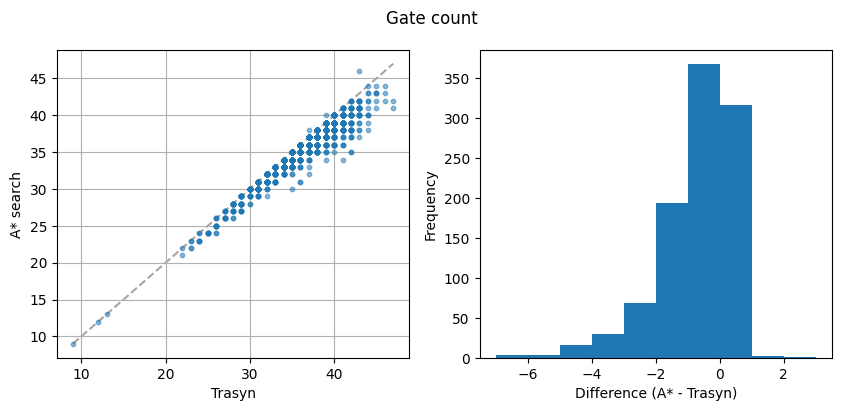

In [17]:
plot_metric(tr_gate, astar_gate, 'Gate count')

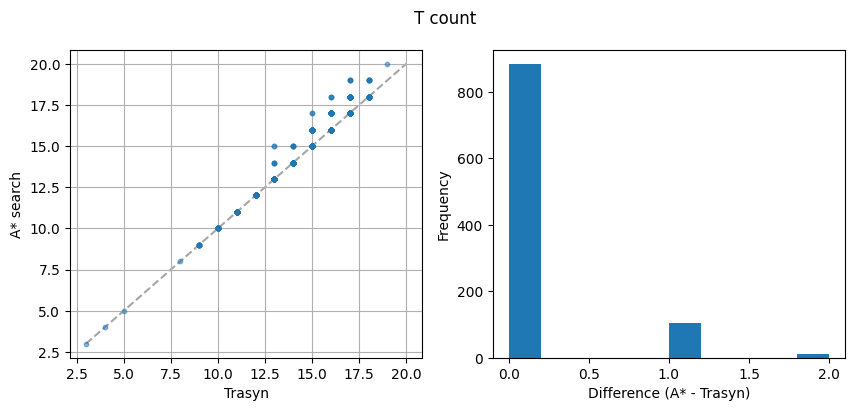

In [18]:
plot_metric(tr_t, astar_t, 'T count')

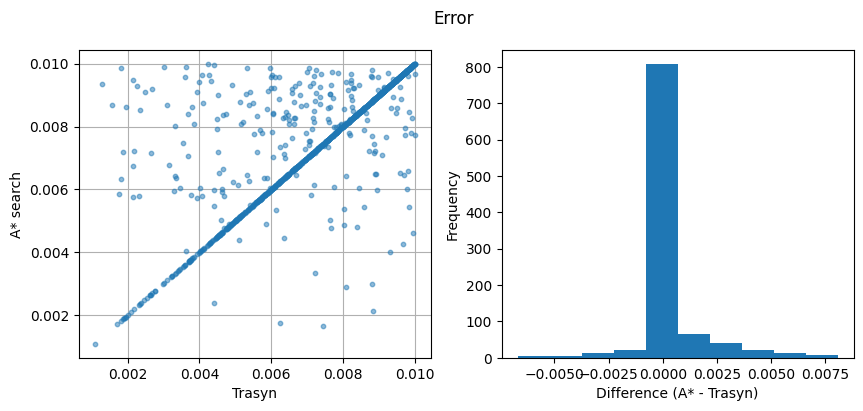

In [19]:
plot_metric(tr_err, astar_err, 'Error', eqline=False)

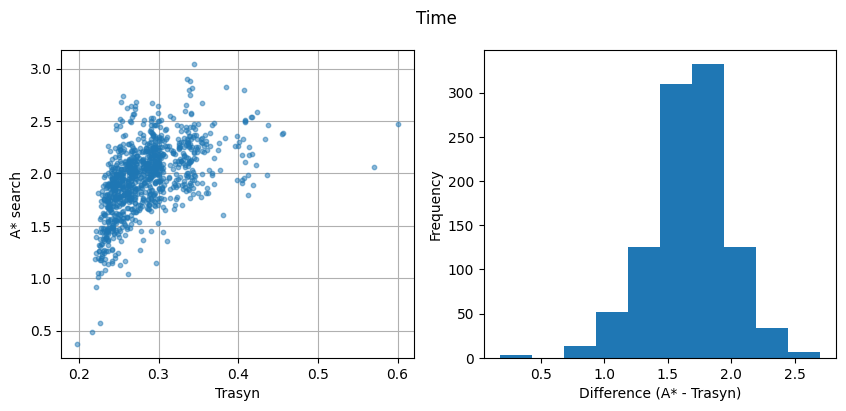

In [20]:
plot_metric(tr_time, astar_time, 'Time', eqline=False)